# **선형회귀모델 (Linear Regression)** <img src="../images/regression.png" width="40" height="40">

- **정의**
  - 출력변수 Y를 입력변수 X들의 선형결합으로 표현한 모델
    - 선형결합 : 변수들을 (상수 배와) 더하기 빼기를 통해 결합

- **목적**
  - X변수와 Y변수 사이의 관계를 수치로 설명
  - 미래의 반응 변수(Y) 값을 예측

<img src="../images/simple_multi.png">

## **1. 선형 회귀 모델의 이해**


- Case 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 데이터 생성
np.random.seed(42)
X1 = np.random.normal(0, 1, 100).reshape(-1, 1)  # 평균 0, 표준편차 1의 정규분포
y1 = 3 * X1.flatten() + 5 + np.random.normal(0, 0.5, 100)  # 선형식에 노이즈 추가

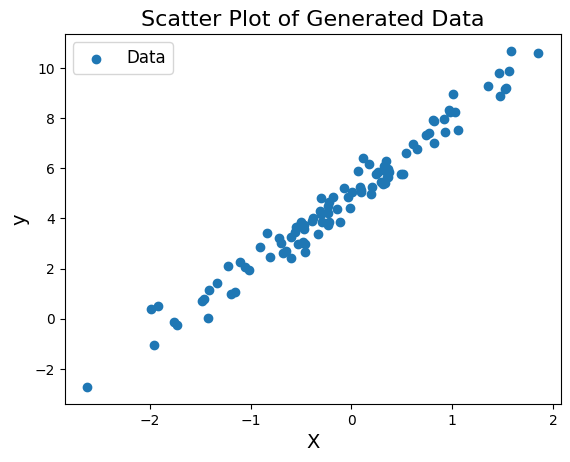

In [2]:
# 산점도 시각화

plt.scatter(X1, y1, label="Data")
plt.title("Scatter Plot of Generated Data", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)

plt.legend(fontsize=12)
plt.show()


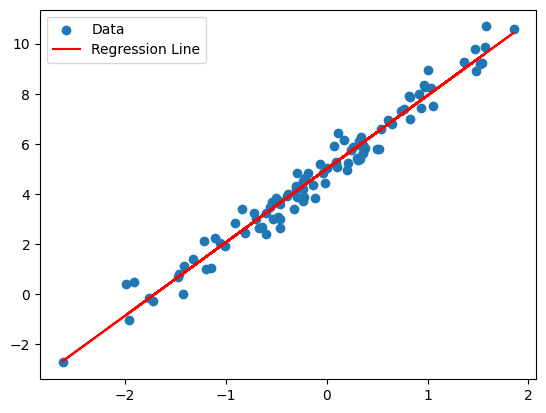

Coefficients: [2.92837142], Intercept: 5.003713914931983
MSE: 0.2209


In [3]:
# 모델 훈련
model1 = LinearRegression()
model1.fit(X1, y1)

# 예측
y_pred1 = model1.predict(X1)

# 결과 시각화
plt.scatter(X1, y1, label="Data")
plt.plot(X1, y_pred1, color="red", label="Regression Line")
plt.legend()
plt.show()

# 결과 출력
print(f"Coefficients: {model1.coef_}, Intercept: {model1.intercept_}")
print(f"MSE: {mean_squared_error(y1, y_pred1):.4f}")

- Case 2

In [4]:
# 데이터 생성
X2 = np.random.uniform(-10, 10, 100).reshape(-1, 1)  
y2 = -2 * X2.flatten() + 8 + np.random.uniform(-1, 1, 100)  

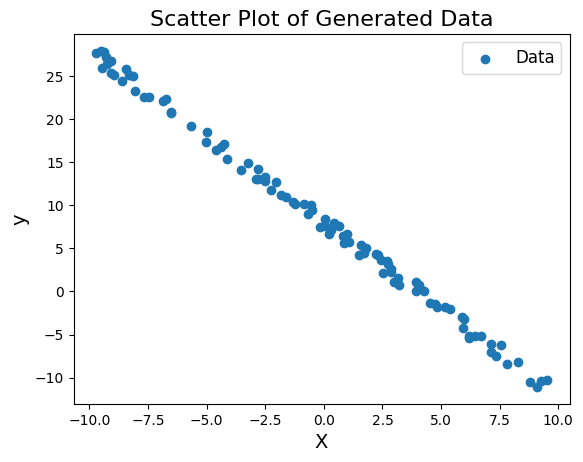

In [5]:
# 산점도 시각화

plt.scatter(X2, y2, label="Data")
plt.title("Scatter Plot of Generated Data", fontsize=16)
plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)

plt.legend(fontsize=12)
plt.show()

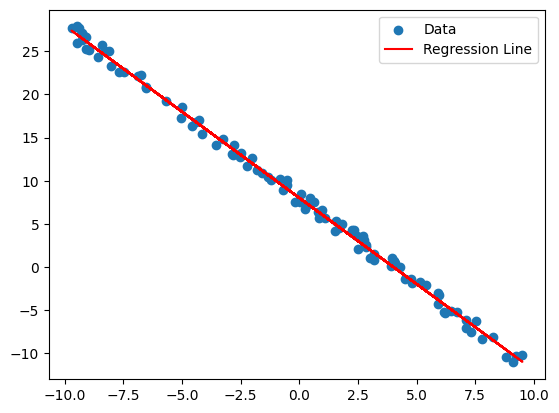

Coefficients: [-1.99720007], Intercept: 8.011355464731501
MSE: 0.3994


In [6]:
# 모델 훈련
model2 = LinearRegression()
model2.fit(X2, y2)

# 예측
y_pred2 = model2.predict(X2)

# 결과 시각화
plt.scatter(X2, y2, label="Data")
plt.plot(X2, y_pred2, color="red", label="Regression Line")
plt.legend()
plt.show()

# 결과 출력
print(f"Coefficients: {model2.coef_}, Intercept: {model2.intercept_}")
print(f"MSE: {mean_squared_error(y2, y_pred2):.4f}")

# <img src="../images/emergency.png" width="40" height="40"> **코드 실습 시간** 

In [7]:
# 데이터 생성
np.random.seed(42)
X3 = np.random.rand(100, 1) * 20 
y3 = 3 * X3 + np.random.randn(100, 1) * 5  # y = 5x + noise

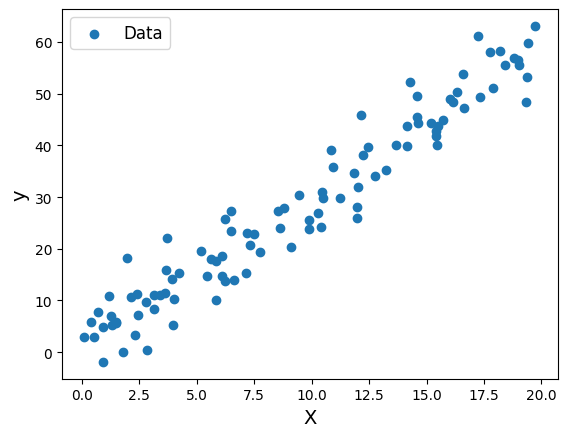

In [8]:
# 데이터 시각화

plt.scatter(X3, y3, label="Data")

plt.xlabel("X", fontsize=14)
plt.ylabel("y", fontsize=14)

plt.legend(fontsize=12)
plt.show()

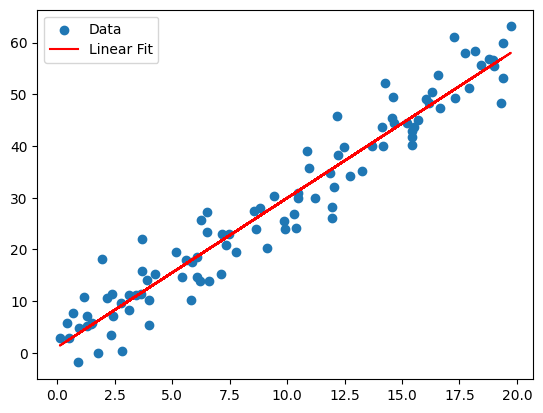

In [9]:
# 모델 훈련
model3 = LinearRegression()
model3.fit(X3, y3)

# 예측
y_pred3 = model3.predict(X3)

# 결과 시각화
plt.scatter(X3, y3, label='Data')
plt.plot(X3, y_pred3, color='red', label='Linear Fit')
plt.legend()
plt.show()

#### <img src="../images/unlock.png" width="25" height="25"> <font color=gray> **퀴즈가 종료되었습니다.** </font>  

***

## **2. 단순 선형 회귀 분석 (Simple Linear Regression)**
    
: 독립 변수 하나와 종속 변수 간의 선형 관계 모델링

\begin{equation}
\hat{y}(w,x) = w_0 + w_1 x_1 \tag{1}
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $w_0$: 편향
  + $w_1$~$w_p$: 가중치

In [10]:
# 필요한 라이브러리 가져오기

import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

- 목적에 따른 파이썬 라이브러리 분류</br></br>
<img src="../images/library_classification.png">

### **2-1. 데이터 불러오기**

In [11]:
data_salary = pd.read_csv('../data/simple_regression_Salary_Data.csv')

print("데이터 셋의 일부를 확인해보면 아래와 같습니다.")
data_salary

데이터 셋의 일부를 확인해보면 아래와 같습니다.


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<html>
    <b><font size=4>* 변수에 대한 설명</font></b><br><br>
- YearsExperience : 경력<br>
- Salary : 연봉
</html>

### **2-2. 데이터 전처리**
- 데이터 결측치 확인

In [12]:
data_salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

- 데이터 중복 확인

In [13]:
data_salary.duplicated().sum()

np.int64(0)

- describe() 함수를 사용해서 수치형 변수들만을 기준으로 카운트, 평균, 표준편차, 최소/최댓값, 4분위 수를 확인

In [14]:
data_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### **2-3. 데이터 시각화**
- 경력(Years of Experience)과 연봉(Salary) 간의 산점도 그리기

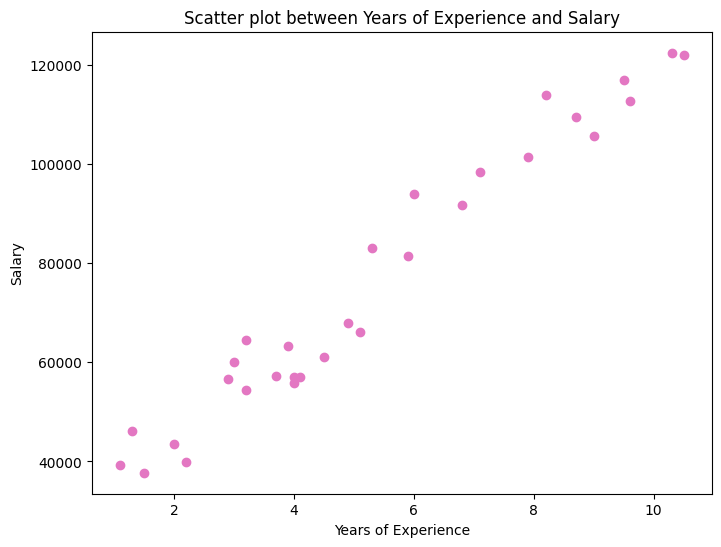

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(data_salary['YearsExperience'], data_salary['Salary'], color='C6')
plt.title('Scatter plot between Years of Experience and Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

- histplot 함수를 통해 데이터 분포의 변화를 파악
- 선과 히스토그램을 결합하여 데이터를 표현

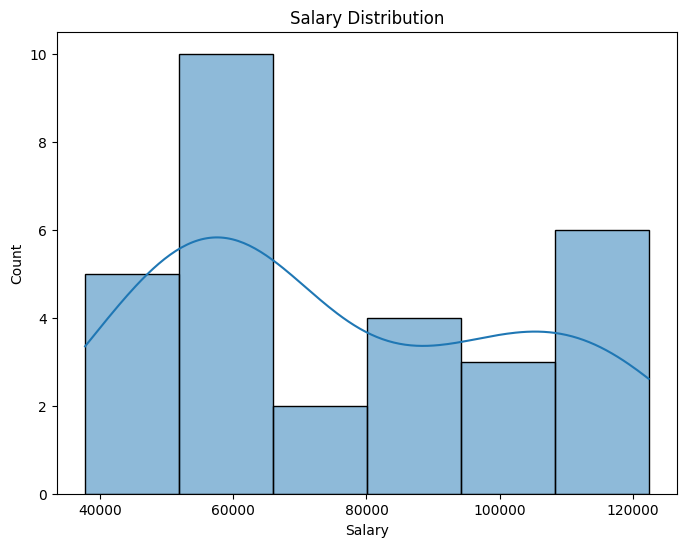

In [16]:
plt.figure(figsize=(8, 6))
plt.title('Salary Distribution')
sns.histplot(data_salary['Salary'], kde=True)  # kde=True는 커널 밀도 추정선을 추가하는 옵션
plt.show()

### **2-4. 데이터 분리**
- 데이터를 학습 데이터 세트와 테스트 데이터 세트로 분리
- 데이터의 80%는 학습에 사용되고 20%는 테스트에 사용

In [17]:
# 독립 변수(X)와 종속 변수(y)를 정의
X_salary = data_salary[['YearsExperience']]  
y_salary = data_salary['Salary']  

X_train_salary, X_test_salary, y_train_salary, y_test_salary = train_test_split(X_salary, y_salary, test_size=0.2, random_state=0)

print("\n학습용 세트 크기:", X_train_salary.shape[0])
print("테스트용 세트 크기:", X_test_salary.shape[0])


학습용 세트 크기: 24
테스트용 세트 크기: 6


### **2-5. 모델 학습**
- LinearRegression 모델 생성 및 학습

In [18]:
model_salary = LinearRegression()
model_salary.fit(X_train_salary, y_train_salary)

print("\n모델 계수(기울기):", model_salary.coef_[0])
print("모델 절편(y절편):", model_salary.intercept_)


모델 계수(기울기): 9312.575126729189
모델 절편(y절편): 26780.09915062818


### **2-6. 모델 예측 수행**
- 테스트 데이터에 대한 연봉 예측

In [19]:
y_pred_salary = model_salary.predict(X_test_salary)

### **2-7. 모델 평가**
- MAE, MSE, R2 값을 비교하여 모델을 평가

In [20]:
mae_salary = mean_absolute_error(y_test_salary,y_pred_salary)
mse_salary = mean_squared_error(y_test_salary, y_pred_salary)
r2_salary = r2_score(y_test_salary, y_pred_salary)

print("\n[모델 평가 지표]")
print("\n- 평균 절대 오차 (MAE):", mae_salary)
print("- 평균 제곱 오차 (MSE):", mse_salary)
print("- R-제곱 (R2) 값:", r2_salary)


[모델 평가 지표]

- 평균 절대 오차 (MAE): 2446.1723690465055
- 평균 제곱 오차 (MSE): 12823412.298126549
- R-제곱 (R2) 값: 0.988169515729126


### **2-8. 시각화를 통한 결과 비교**
- plot 색상 참고 <br><br>
<img src="../images/matplotlib_color.png" width="270" height="200">

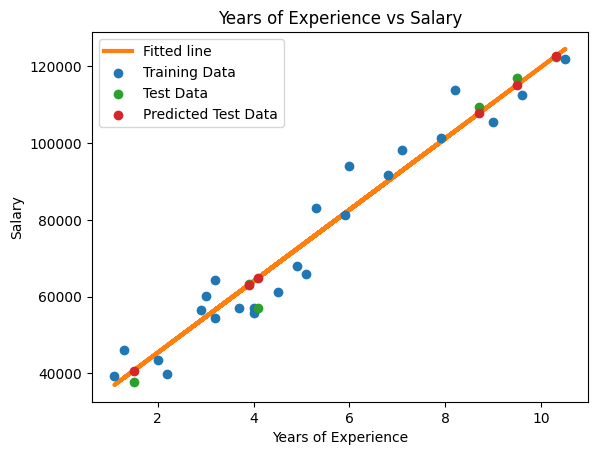

In [21]:
plt.plot(X_train_salary, model_salary.predict(X_train_salary) , linewidth=3, color='C1', zorder=1, label='Fitted line')

plt.scatter(X_train_salary, y_train_salary, color='C0', zorder=2, label='Training Data')
plt.scatter(X_test_salary, y_test_salary, color='C2', zorder=3, label='Test Data')

plt.scatter(X_test_salary, y_pred_salary, color='C3', zorder=4, label='Predicted Test Data')

plt.title("Years of Experience vs Salary")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.legend()

plt.show()

# <img src="../images/emergency.png" width="40" height="40"> **코드 실습 시간** 

##### **아래 데이터를 이용해서 실습을 진행해주세요!**

### **1) 데이터 불러오기**

In [22]:
data_test = pd.read_csv('../data/Height_Weight.csv')

print("\n데이터 셋의 일부를 확인해보면 아래와 같습니다.")
data_test.head()


데이터 셋의 일부를 확인해보면 아래와 같습니다.


,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


### **2) 데이터 전처리**
- 데이터 결측치 확인

In [23]:
# 데이터 결측치를 확인하는 코드를 작성해주세요.
data_test.isnull().sum()

Index             0
Height(Inches)    0
Weight(Pounds)    0
dtype: int64

- 데이터 중복 확인

In [24]:
# 데이터의 중복을 확인하는 코드를 작성해주세요.
data_test.duplicated().sum()

np.int64(0)

- 중복 데이터를 제거

In [25]:
# 중복 데이터가 있다면 중복 데이터를 제거하는 코드를 작성해주세요.
data_test.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


### **3) 데이터 분리**

In [26]:
# 학습 데이터와 테스트 데이터로 데이터를 나누는 코드를 작성해주세요. (비율은 80:20)
# 예측 target 값은 'Weight(Pounds)' 컬럼 입니다.

X_test = data_test[['Height(Inches)']]  
y_test = data_test[['Weight(Pounds)']]  

X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=0)

### **4) 모델 학습**

In [27]:
# LinearRegression를 사용하여 모델을 구축하는 코드를 작성해주세요.

model = LinearRegression()
model.fit(X_train, y_train)

print("\n모델 계수(기울기):", model.coef_[0])
print("모델 절편(y절편):", model.intercept_)



모델 계수(기울기): [3.06281405]
모델 절편(y절편): [-81.11447644]


### **5) 모델 예측 수행**

In [28]:
# 모델 예측을 수행하는 코드를 작성해주세요.

y_pred = model.predict(X_test)

### **6) 모델 평가**
- MAE, MSE, R2 값을 비교하여 모델을 평가

In [29]:
# 위 3가지의 평가지표를 사용해 모델을 평가하는 코드를 작성해주세요.

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n[모델 평가 지표]")
print("\n- 평균 절대 오차 (MAE):", mae)
print("- 평균 제곱 오차 (MSE):", mse)
print("- R-제곱 (R2) 값:", r2)


[모델 평가 지표]

- 평균 절대 오차 (MAE): 8.187041886060046
- 평균 제곱 오차 (MSE): 105.05298919282605
- R-제곱 (R2) 값: 0.2588330299924131


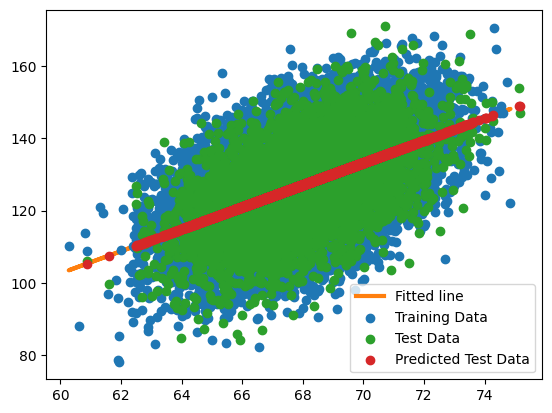

In [30]:
plt.plot(X_train, model.predict(X_train) , linewidth=3, color='C1', zorder=1, label='Fitted line')

plt.scatter(X_train, y_train, color='C0', zorder=2, label='Training Data')
plt.scatter(X_test, y_test, color='C2', zorder=3, label='Test Data')

plt.scatter(X_test, y_pred, color='C3', zorder=4, label='Predicted Test Data')

plt.legend()

plt.show()

#### <img src="../images/unlock.png" width="25" height="25"> <font color=gray> **퀴즈가 종료되었습니다.** </font>  